In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

import natsort as ns


import matplotlib.pyplot as plt

In [2]:
erp = pd.read_excel("C:/Users/ocon_/Sync/1_Data_analyst/P5_ocon_jorge/donnees/erp.xlsx")
liaison = pd.read_excel("C:/Users/ocon_/Sync/1_Data_analyst/P5_ocon_jorge/donnees/liaison.xlsx")
web = pd.read_excel("C:/Users/ocon_/Sync/1_Data_analyst/P5_ocon_jorge/donnees/web.xlsx")

C:\Users\ocon_\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\ocon_\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\ocon_\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
print('numpy version is {}'.format(np.__version__))
print('pandas version is {}'.format(pd.__version__))
print('seaborn version is {}'.format(sns.__version__))
print('natsort version is {}'.format(ns.__version__))

numpy version is 1.21.5
pandas version is 1.4.2
seaborn version is 0.11.2
natsort version is 8.1.0


## Revision du tableau "erp"

### 1 - Types

In [4]:
erp.dtypes

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object

### 2 - Nulls

In [5]:
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

### 3 - Doublons

In [6]:
erp.loc[erp[['product_id', 'price']].duplicated(keep=False),:]

,product_id,onsale_web,price,stock_quantity,stock_status


### 4 - Outliers

In [7]:
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.415636,26.496970
std,902.644635,0.337506,26.795849,45.892422
min,3847.000000,0.000000,5.200000,0.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


## Revision du tableau "web"

### 0 - Sorting by index and rename of column "sku" for "id_web"

In [8]:
web2 = web.copy()
web2.rename(columns={"sku" : "id_web"}, inplace=True) ## web_id 
web2 = web2.iloc[ns.index_humansorted(web2['id_web'])]

### 1 - Types

In [9]:
web2.dtypes

id_web                           object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent                     float64
guid                             object
menu_order                      float64


In [10]:
web2["total_sales"] = web2["total_sales"].astype("int64", errors='ignore')

### 2 - Nulls

In [11]:
web2.shape

(1513, 28)

In [12]:
web2.isnull().sum()

id_web                     85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64

In [13]:
web2.loc[web2['id_web'].isnull() & web2['total_sales'].notnull() ,:]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [14]:
web2.dropna(subset=['id_web'], inplace=True)
web2.shape

(1428, 28)

In [15]:
web2.isnull().sum()

id_web                      0
virtual                     0
downloadable                0
rating_count                0
average_rating              0
total_sales                 0
tax_status                714
tax_class                1428
post_author                 0
post_date                   0
post_date_gmt               0
post_content             1428
post_title                  0
post_excerpt              714
post_status                 0
comment_status              0
ping_status                 0
post_password            1428
post_name                   0
post_modified               0
post_modified_gmt           0
post_content_filtered    1428
post_parent                 0
guid                        0
menu_order                  0
post_type                   0
post_mime_type            714
comment_count               0
dtype: int64

### 3 - Doublons

In [16]:
web2.loc[web2[['id_web']].duplicated(keep=False),:]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
339,38,0,0,0,0.0,38.0,taxable,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1123,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,2020-08-27 17:15:03,2020-08-27 15:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
269,41,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1060,41,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-04-14 12:01:43,...,marcel-windholtz-eau-de-marc-de-gewurztraminer,2020-08-03 10:25:02,2020-08-03 08:25:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
70,304,0,0,0,0.0,40.0,taxable,NaN,2.0,2018-02-13 12:57:44,...,gosset-champagne-grande-reserve,2020-08-27 11:25:02,2020-08-27 09:25:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,19821,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-11-26 10:56:30,...,tempier-bandol-tourtine-2017,2019-11-02 12:59:24,2019-11-02 11:59:24,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
527,19822,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-11-26 10:59:10,...,tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1301,19822,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-11-26 10:59:10,...,tempier-bandol-cabassaou-2017,2020-01-04 13:57:04,2020-01-04 12:57:04,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [17]:
web2.drop_duplicates(subset=['post_date', 'post_modified', 'total_sales', "id_web"], inplace=True, ignore_index=True)

In [18]:
web2.loc[web2[['id_web']].duplicated(keep=False),:]

,id_web,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


### 4 - Outliers

In [19]:
web2.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0


#### Liaison

In [20]:
liaison.isnull().sum()

product_id     0
id_web        91
dtype: int64

## MERGE - erp - liaison - web

In [21]:
liaison.shape

(825, 2)

In [22]:
erp.shape

(825, 5)

In [23]:
web2.shape

(714, 28)

In [24]:
join_erp = erp.merge(liaison, on="product_id")
join_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


In [25]:
erp_web = join_erp.merge(web2, on="id_web")

In [26]:
erp_web = erp_web.drop(['post_name', 'guid'] , axis=1)

In [27]:
erp_web.head()

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,virtual,downloadable,rating_count,average_rating,...,ping_status,post_password,post_modified,post_modified_gmt,post_content_filtered,post_parent,menu_order,post_type,post_mime_type,comment_count
0,3847,1,24.2,0,outofstock,15298,0,0,0,0.0,...,closed,NaN,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,0.0,product,NaN,0.0
1,3849,1,34.3,0,outofstock,15296,0,0,0,0.0,...,closed,NaN,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,0.0,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,0,0,0,0.0,...,closed,NaN,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,0.0,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,0,0,0,0.0,...,closed,NaN,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,0.0,product,NaN,0.0
4,4039,1,46.0,0,outofstock,19815,0,0,0,0.0,...,closed,NaN,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,0.0,product,NaN,0.0


In [28]:
erp_web.shape

(714, 31)

### Analyse des données 

In [29]:
CA_produit = erp_web[['product_id','id_web', 'price', 'total_sales']].copy()

#### chiffres d'affaires (CA)

In [30]:
CA_produit["chiffre_daffaires"] = CA_produit["total_sales"] * CA_produit["price"]

In [31]:
CA_produit = CA_produit.sort_values(by=['chiffre_daffaires'], ascending=False)

In [32]:
CA_produit['cum_sum'] = CA_produit['chiffre_daffaires'].cumsum()
CA_produit['cum_perc'] = 100*CA_produit['cum_sum']/CA_produit['chiffre_daffaires'].sum()

In [33]:
CA_produit.head(10)

,product_id,id_web,price,total_sales,chiffre_daffaires,cum_sum,cum_perc
194,4334,7818,49.0,96.0,4704.0,4704.0,6.665854
71,4144,1662,49.0,87.0,4263.0,8967.0,12.706785
218,4402,3510,176.0,13.0,2288.0,11255.0,15.949020
70,4142,11641,53.0,30.0,1590.0,12845.0,18.202147
69,4141,304,39.0,40.0,1560.0,14405.0,20.412761
201,4355,12589,126.5,11.0,1391.5,15796.5,22.384602
199,4352,15940,225.0,5.0,1125.0,16921.5,23.978795
79,4153,16237,29.0,36.0,1044.0,17965.5,25.458207
651,6206,16580,25.2,41.0,1033.2,18998.7,26.922314
30,4068,16416,16.6,62.0,1029.2,20027.9,28.380753


<AxesSubplot:ylabel='Density'>

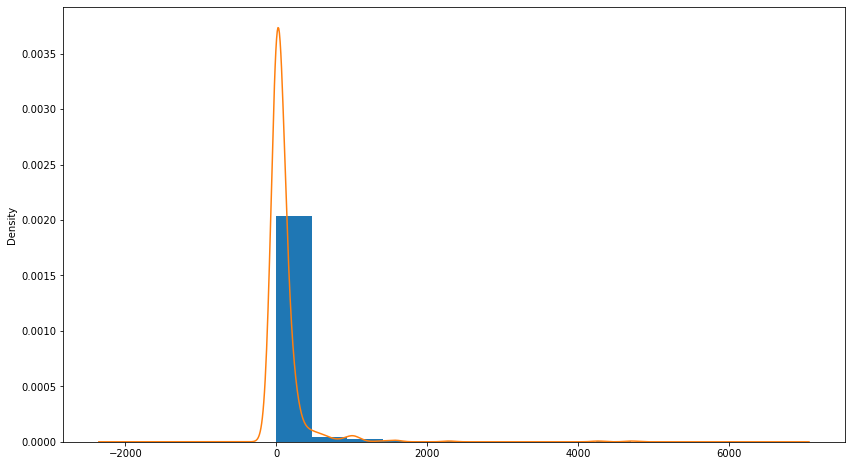

In [34]:
CA_produit["chiffre_daffaires"].hist(density=True)
CA_produit.chiffre_daffaires.plot.density(figsize=(14,8))

In [35]:
CA_produit.sort_values(by=['chiffre_daffaires'], ascending=False)


,product_id,id_web,price,total_sales,chiffre_daffaires,cum_sum,cum_perc
194,4334,7818,49.0,96.0,4704.0,4704.0,6.665854
71,4144,1662,49.0,87.0,4263.0,8967.0,12.706785
218,4402,3510,176.0,13.0,2288.0,11255.0,15.949020
70,4142,11641,53.0,30.0,1590.0,12845.0,18.202147
69,4141,304,39.0,40.0,1560.0,14405.0,20.412761
...,...,...,...,...,...,...,...
608,5932,523,59.9,0.0,0.0,70568.6,100.000000
691,6628,15792,32.2,0.0,0.0,70568.6,100.000000
610,5951,16472,74.5,0.0,0.0,70568.6,100.000000
611,5956,15895,17.2,0.0,0.0,70568.6,100.000000


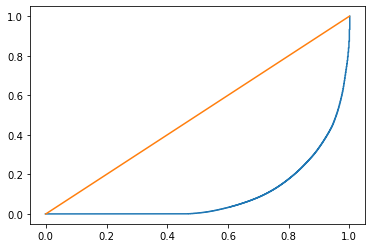

In [36]:
Lorenz_CA = CA_produit["chiffre_daffaires"]
#dep = -depenses['montant'].values
n = len(Lorenz_CA)
lorenz = np.cumsum(np.sort(Lorenz_CA)) / Lorenz_CA.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1]) #tracer la bisséctrice
plt.show()

In [54]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [37]:
CA_produit["chiffre_daffaires"].sum()

70568.6

In [55]:
gini(CA_produit["chiffre_daffaires"])

0.8050420469738447

#### Analyse variable price 

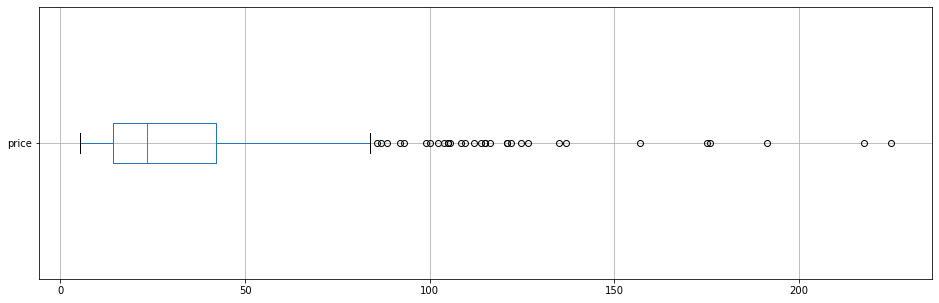

In [38]:
CA_produit.boxplot(column="price", vert=False, figsize=(16,5))
plt.show()

#### methode IQR

In [39]:
#(q3-q1)*1.5 + q3
q1 = np.percentile(CA_produit["price"],25)
q3 = np.percentile(CA_produit["price"],75)

In [40]:
B = (q3-q1)*1.5 + q3

In [41]:
B

84.28750000000001

In [42]:
outliers = CA_produit.loc[CA_produit["price"] > B]

In [43]:
outliers.shape

(32, 7)

In [44]:
outliers.describe()

,product_id,price,total_sales,chiffre_daffaires,cum_sum,cum_perc
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,5267.937500,124.571875,1.406250,217.812500,59809.521875,84.753732
std,766.699964,36.068727,3.109397,505.080853,18961.058098,26.868973
min,4115.000000,85.600000,0.000000,0.000000,11255.000000,15.949020
25%,4406.750000,103.575000,0.000000,0.000000,57088.150000,80.897382
50%,5025.500000,114.500000,0.000000,0.000000,70568.600000,100.000000
75%,5970.000000,128.625000,1.250000,132.250000,70568.600000,100.000000
max,6216.000000,225.000000,13.000000,2288.000000,70568.600000,100.000000


#### methode Z-score

In [45]:
#(i - M) / STD

In [46]:
M = np.mean(CA_produit["price"])
STD = np.std(CA_produit["price"])


In [47]:
CA_produit["z_score"] = (CA_produit["price"] - M) / STD

In [48]:
CA_produit.head(10)

,product_id,id_web,price,total_sales,chiffre_daffaires,cum_sum,cum_perc,z_score
194,4334,7818,49.0,96.0,4704.0,4704.0,6.665854,0.593963
71,4144,1662,49.0,87.0,4263.0,8967.0,12.706785,0.593963
218,4402,3510,176.0,13.0,2288.0,11255.0,15.949020,5.163781
70,4142,11641,53.0,30.0,1590.0,12845.0,18.202147,0.737895
69,4141,304,39.0,40.0,1560.0,14405.0,20.412761,0.234135
201,4355,12589,126.5,11.0,1391.5,15796.5,22.384602,3.382632
199,4352,15940,225.0,5.0,1125.0,16921.5,23.978795,6.926939
79,4153,16237,29.0,36.0,1044.0,17965.5,25.458207,-0.125693
651,6206,16580,25.2,41.0,1033.2,18998.7,26.922314,-0.262428
30,4068,16416,16.6,62.0,1029.2,20027.9,28.380753,-0.571880


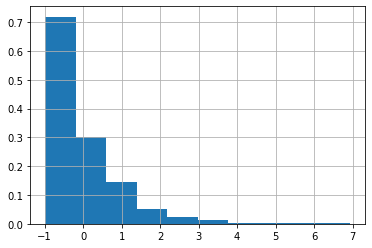

In [49]:
CA_produit["z_score"].hist(density=True)
plt.show()

In [50]:
df_zscore = CA_produit.loc[np.abs(CA_produit["z_score"]) > 2] #outliers total sales

In [51]:
df_zscore.shape

(30, 8)

In [52]:
df_zscore.describe()

,product_id,price,total_sales,chiffre_daffaires,cum_sum,cum_perc,z_score
count,30.00000,30.0000,30.000000,30.000000,30.00000,30.000000,30.000000
mean,5306.30000,127.1300,1.466667,229.480000,59360.35000,84.117228,3.405301
std,772.23014,35.8097,3.202729,519.923746,19490.03808,27.618570,1.288534
min,4115.00000,88.4000,0.000000,0.000000,11255.00000,15.949020,2.011686
25%,4450.75000,105.0000,0.000000,0.000000,50341.85000,71.337465,2.609001
50%,5295.00000,115.0000,0.000000,0.000000,70568.60000,100.000000,2.968829
75%,6074.00000,132.8750,1.750000,188.750000,70568.60000,100.000000,3.612022
max,6216.00000,225.0000,13.000000,2288.000000,70568.60000,100.000000,6.926939
